# Exploratory Data Analysis

Notebook supporting the [**Do we know our data, as good as we know our tools** talk](https://devoxxuk19.confinabox.com/talk/VEM-8021/Do_we_know_our_data_as_good_as_we_know_our_tools%3F) at [Devoxx UK 2019](http://twitter.com/@DevoxxUK).

The contents of the notebook is inspired by many sources.

### High-level steps covered:

- Know the domain knowledge
- Start with basics: get a feeling of the data
- Check descriptive statistics
- Plot distribution of features
- Check correlations between features, with target column

Steps suggested by [Machine Learning Master: Understand Your Machine Learning Data With Descriptive Statistics in Python](https://machinelearningmastery.com/understand-machine-learning-data-descriptive-statistics-python/):
- Peek at Your data
- Dimensions of Your Data
- Data Type For Each Attribute
- Descriptive Statistics
- Class Distribution (Classification Only)
- Correlation Between Attributes
- Skew of Univariate Distributions

### Resources 

- [Helpful Python Code Snippets for Data Exploration in Pandas](https://medium.com/@msalmon00/helpful-python-code-snippets-for-data-exploration-in-pandas-b7c5aed5ecb9)
- [The Ultimate Python Seaborn Tutorial: Gotta Catch ‘Em All](https://elitedatascience.com/python-seaborn-tutorial)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

#### Visualisation:

- [Fundamentals of Data Visualization](https://serialmentor.com/dataviz/)
- [Visualize Machine Learning Data in Python With Pandas](https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/)
- [Python Data Science Notebooks](https://github.com/donnemartin/data-science-ipython-notebooks)

#### Notebooks exploring the ML workflow (start-to-finish):

- [Learn Machine Learning in a Weekend: Day 1: Regression](https://colab.research.google.com/drive/19uoDyGAxJ0zCwPT6cNb1xkYOfySNZChV#scrollTo=P8BmebTwGIhS)
- [Learn Machine Learning in a Weekend: Day 2: Classification](https://colab.research.google.com/drive/1i-fOhU87wWrzgnTV0o54MQyHmRVJK0qt#scrollTo=cy6gO2H7oL3E)


Please refer to the [Slides](http://bit.ly/do-we-know-our-data) for the step here after.

### Know the domain knowledge

Ask all the questions you should ask with regards to the domain and related domains or sub-domains.

It is a good idea to know the **why** part of the action, why are we doing what we are doing with the data, see the [five whys](https://en.wikipedia.org/wiki/5_Whys).

Some ideas (of course, please come up with your own as well):

- We want to solve a problem in the end, with ML, and have good results. If we don’t understand our data, we might not be able to train a model because of incoherent or missing data, or have poor results because we have misleading (unbalanced, highly correlated, too many useless features) data. Thus we need to find out if there are incoherent/missing/misleading data
- Black box: if anything wrong, if we don’t understand our data, we won’t be able to correct it
- If you don’t have domain knowledge, you risk wasting time on finding the root causes of issues. 
- When I work with someone, I want to get to know that person to get the best out of your relationship
- Know the nature / boundaries / source of the data




### Start with basics: get a feeling of the data


#### Load Your Data

In [0]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
names = ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"]
data = pandas.read_csv(url, names=names)

!rm  housing.names || true
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names &> /dev/null
print("Names and descriptions of the fields of the Boston Housing dataset can be found at")
print("https://github.com/jbrownlee/Datasets/blob/master/housing.names")
print("")
!cat housing.names

Names and descriptions of the fields of the Boston Housing dataset can be found at
https://github.com/jbrownlee/Datasets/blob/master/housing.names

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns hous

#### Peek at Your Data
Looking at the raw data can reveal insights that you cannot get any other way.

Subsets of data from the head or tail of the dataset can be helpful.

In [0]:
peek = data.head(10)
print(peek)
print()
peek = data.tail(10)
print(peek)
print()
print("The first column lists the row number, which is handy for referencing a specific observation.")

    crim    zn  indus  chas    nox     rm    age    dis  rad    tax  ptratio       b  lstat  medv
0  0.006  18.0   2.31     0  0.538  6.575   65.2  4.090    1  296.0     15.3  396.90   4.98  24.0
1  0.027   0.0   7.07     0  0.469  6.421   78.9  4.967    2  242.0     17.8  396.90   9.14  21.6
2  0.027   0.0   7.07     0  0.469  7.185   61.1  4.967    2  242.0     17.8  392.83   4.03  34.7
3  0.032   0.0   2.18     0  0.458  6.998   45.8  6.062    3  222.0     18.7  394.63   2.94  33.4
4  0.069   0.0   2.18     0  0.458  7.147   54.2  6.062    3  222.0     18.7  396.90   5.33  36.2
5  0.030   0.0   2.18     0  0.458  6.430   58.7  6.062    3  222.0     18.7  394.12   5.21  28.7
6  0.088  12.5   7.87     0  0.524  6.012   66.6  5.561    5  311.0     15.2  395.60  12.43  22.9
7  0.145  12.5   7.87     0  0.524  6.172   96.1  5.950    5  311.0     15.2  396.90  19.15  27.1
8  0.211  12.5   7.87     0  0.524  5.631  100.0  6.082    5  311.0     15.2  386.63  29.93  16.5
9  0.170  12.5   7.8

####  Dimensions of Your Data
Have a very good handle on how much data you have, both in terms of rows and columns.

In [0]:
shape = data.shape
print("(rows, columms) = ", shape)
print()
print("Rows: too few rows mean you don't have enough data for your algoritms to train")
print("      too many rows mean your training process will take long")
print("Columns / features: too few columns/features again will have an impact on generalising or usefulness of the model")
print("      too many columns/featurs could cause training performance to suffer, and does not mean better accuracy")

(rows, columms) =  (506, 14)

Rows: too few rows mean you don't have enough data for your algoritms to train
      too many rows mean your training process will take long
Columns / features: too few columns/features again will have an impact on generalising or usefulness of the model
      too many columns/featurs could cause training performance to suffer, and does not mean better accuracy


#### Data Type For Each Attribute

It's important to know the column attributes, since string values may need to be converted to floating point values or integers to represent categorical or ordinal values. If all of them are numbers they will still need to be standardised or normalised.

_Best to list all the attributes of the dataset._

In [0]:
types = data.dtypes
print(types)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax        float64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


#### Other attributes of the data


In [0]:
print("Names of columns", data.columns)   # column names (which is “an index”)
print()
print("Overview of values as an array", data.values)    # underlying numpy array — df are stored as numpy arrays for effeciencies.
print()
print("Shape of the dataset", data.shape)
print()

Names of columns Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b',
       'lstat', 'medv'],
      dtype='object')

Overview of values as an array [[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]

Shape of the dataset (506, 14)



### Check descriptive statistics

Descriptive statistics can give you great insight into the shape of each attribute.

 -  Count
 -  Mean
 -  Standard Devaition
 -  Minimum Value
 -  25th Percentile
 -  50th Percentile (Median)
 -  75th Percentile
 -  Maximum Value

In [0]:
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)
print()
print("It is worth taking some time and reviewing observations from the results.")
print("This might include the presence of “NA” values for missing data or surprising distributions for attributes.")
data.describe()


It is worth taking some time and reviewing observations from the results.
This might include the presence of “NA” values for missing data or surprising distributions for attributes.


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


#### Count missing values

Count the number of missing values across all the columns

In [0]:
data[data.isnull()].count()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

#### Count occurrence of values per column

Count the number times each value in a column is occurring across the whole dataset

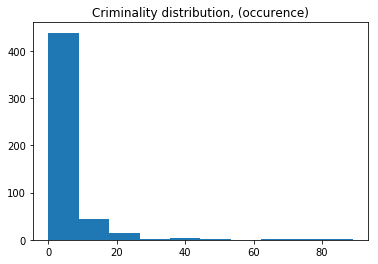

Print the count for other columns as well, maybe even plot them on a bar chart / histogram


In [0]:
plt.hist(data["crim"], bins = 10)
plt.title('Criminality distribution, (occurence)')
plt.show()

print("Print the count for other columns as well, maybe even plot them on a bar chart / histogram")

#### Count number of unique values per column

Count the number unique values in a column occurring across the whole dataset

In [0]:
data.ptratio.nunique()

46

#### Duplicated rows
Get stats on the number of non-unqiue or duplicate rows in a dataset

In [0]:
print("Duplicate rows count", data.duplicated().count())
data[data.duplicated()]

Duplicate rows count 506


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


### Plot distribution of features

#### Class Distribution (Classification Only)
On classification problems you need to know how balanced the class values are.

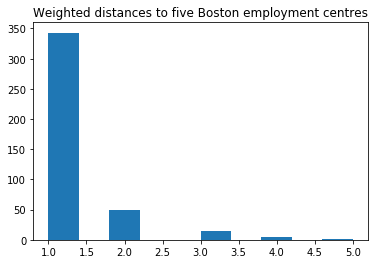


One of the employment centres outweights the rest of the centres by many times (greater than sum of them all).


In [0]:
class_counts = pandas.value_counts(data["dis"])

plt.hist(class_counts, bins = 10)
plt.title('Weighted distances to five Boston employment centres')
plt.show()

print()
print("One of the employment centres outweights the rest of the centres by many times (greater than sum of them all).")

#### Histogram for numeric data

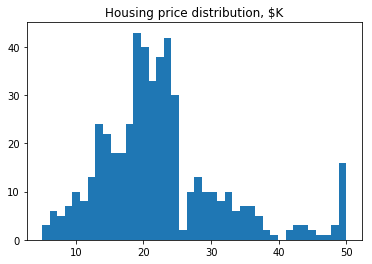

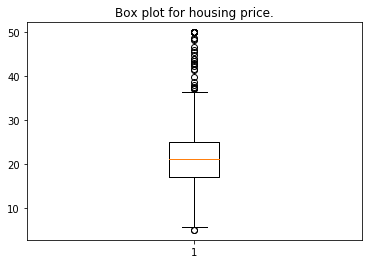

In [0]:
# we can plot a histogram in a slightly different way 
plt.hist(data["medv"], bins = 40)
plt.title('Housing price distribution, $K')
plt.show()

# and the same for the boxplot
plt.boxplot(data["medv"])
plt.title('Box plot for housing price.')
plt.show()

#### Bar chart for categories

In [0]:
data[data["chas"] == 0].count()[0]

471

### Check correlations

#### Scatter charts for numeric data

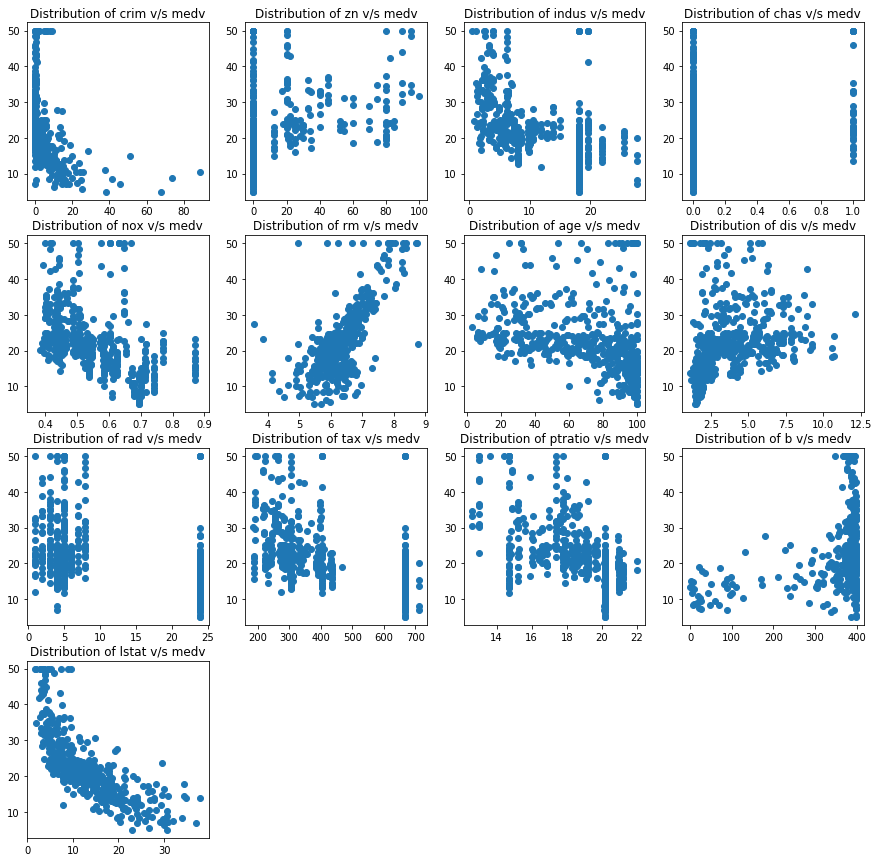

In [0]:
plot_index=1
max_plots=4
for column in data.columns: 
  if column != "medv":
      axes = plt.subplot(4, max_plots, plot_index)
      axes.set_title('Distribution of '+ column + " v/s medv")
      axes.figure.set_figheight(15)
      axes.figure.set_figwidth(15)
      axes.figure.set_tight_layout(False)
      plt.scatter(data[column], data["medv"], marker='o')
      plot_index=plot_index+1

#### Box whisker / violin plots for category data vs numeric

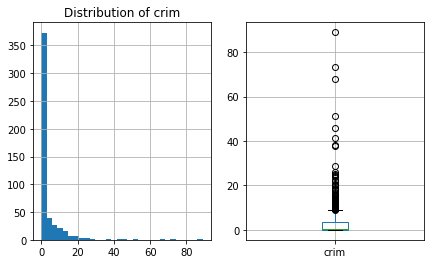

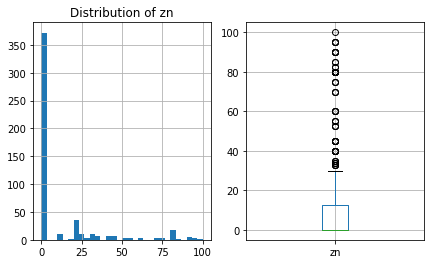

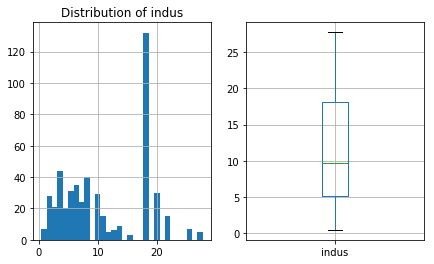

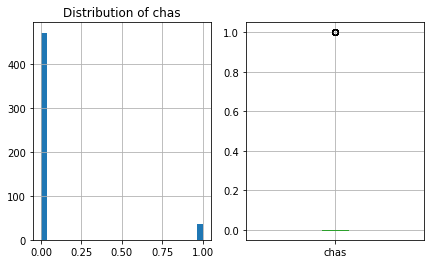

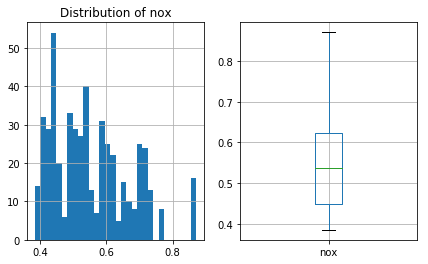

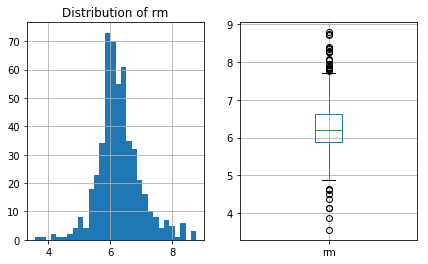

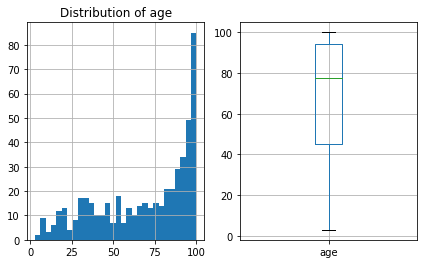

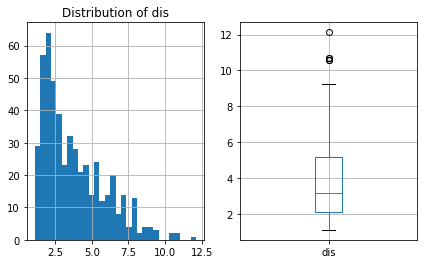

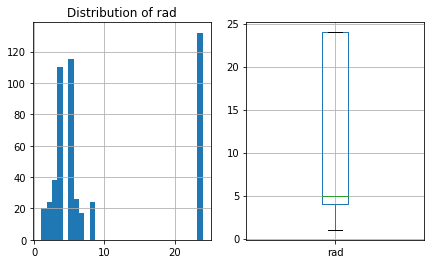

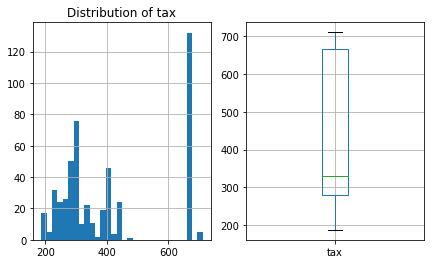

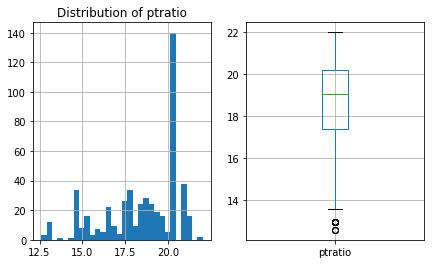

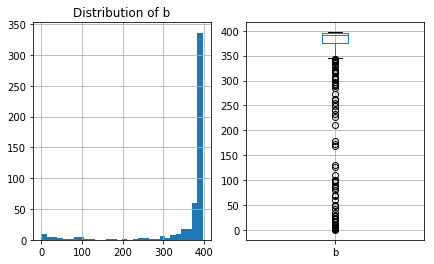

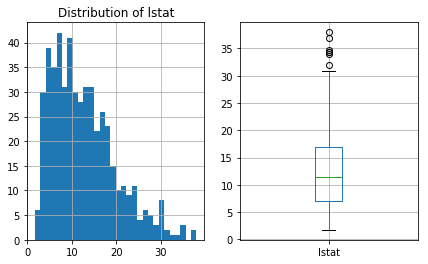

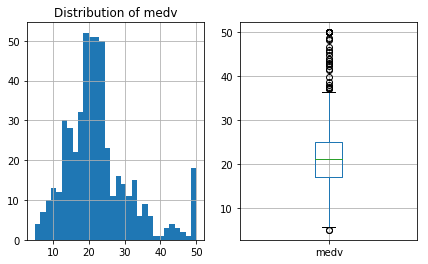

In [0]:
# we loop through all the columns
for col in data.columns:
    # and for each column we create space for one row with 2 charts 
    f, axes = plt.subplots(1, 2, figsize=(7, 4))
    # our first chart is a histogram and we set the title 
    data[col].hist(bins = 30, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    # our second column is the boxplot 
    data.boxplot(column = col, ax = axes[1])
    # we then use this to command to display the charts
    plt.show()

#### Correlation Between Attributes

Correlation refers to the relationship between two variables and how they may or may not change together.

          crim     zn  indus   chas    nox     rm    age    dis    rad    tax  ptratio      b  \
crim     1.000 -0.200  0.407 -0.056  0.421 -0.219  0.353 -0.380  0.626  0.583    0.290 -0.385   
zn      -0.200  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312 -0.315   -0.392  0.176   
indus    0.407 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595  0.721    0.383 -0.357   
chas    -0.056 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007 -0.036   -0.122  0.049   
nox      0.421 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611  0.668    0.189 -0.380   
rm      -0.219  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210 -0.292   -0.356  0.128   
age      0.353 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456  0.506    0.262 -0.274   
dis     -0.380  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495 -0.534   -0.232  0.292   
rad      0.626 -0.312  0.595 -0.007  0.611 -0.210  0.456 -0.495  1.000  0.910    0.465 -0.444   
tax      0.583 -0.315  0.721 -

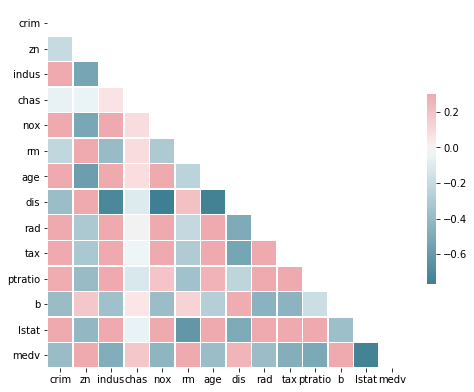

In [0]:
# Pairwise Pearson correlations
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)
print()
print("A correlation of -1 or 1 shows a full negative (inverse) or positive (direct) correlation respectively.") 
print("A value of 0 shows no correlation at all.")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Skew of Univariate Distributions

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another.

crim       5.223
zn         2.226
indus      0.295
chas       3.406
nox        0.729
rm         0.404
age       -0.599
dis        1.012
rad        1.005
tax        0.670
ptratio   -0.802
b         -2.890
lstat      0.906
medv       1.108
dtype: float64

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.


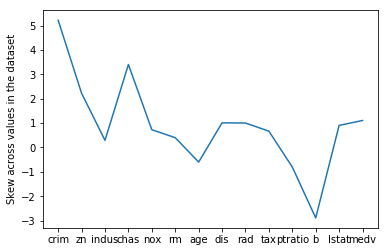

In [0]:
skew = data.skew()
print(skew)
print()
print("The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.")

plt.plot(skew)
plt.ylabel('Skew across values in the dataset')
plt.show()

### Please refer to the [Slides](http://bit.ly/do-you-know-your-data) for the step here after.